In [8]:
import pandas as pd
from matplotlib import pyplot as plt

from src.utils import moving_average

In [9]:
data = pd.read_csv("./results/trpo-train-rewards.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18037 entries, 0 to 18036
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   epoch        18037 non-null  int64  
 1   length       18037 non-null  int64  
 2   reward       18037 non-null  float64
 3   energy       18037 non-null  float64
 4   policy_loss  18037 non-null  float64
 5   value_loss   18037 non-null  float64
 6   kl           18037 non-null  float64
 7   entropy      18037 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.1 MB


In [10]:
def plot_stats(data: pd.DataFrame, ax):
    for idx, metric in enumerate(["reward", "energy"]):
        ax.plot(data[metric], color=f"C{idx}", alpha=0.20)
        ax.plot(*moving_average(data[metric], n=100), color=f"C{idx}", label=metric)

    ax.axhline(10000, linestyle="--", color="C0", label="Max reward")  
    ax.axhline(11722, linestyle="--", color="C1", label="Max energy")
    ax.set_xlabel("Episode")
    ax.set_ylabel("Value")
    ax.grid()
    ax.legend()


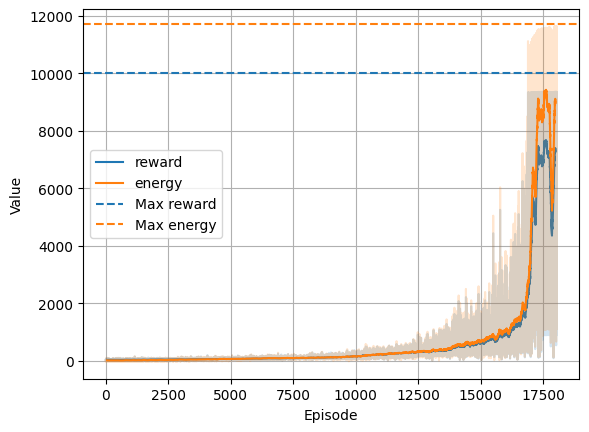

In [11]:
fig, axs = plt.subplots(1, 1)

plot_stats(data, axs)
plt.show()

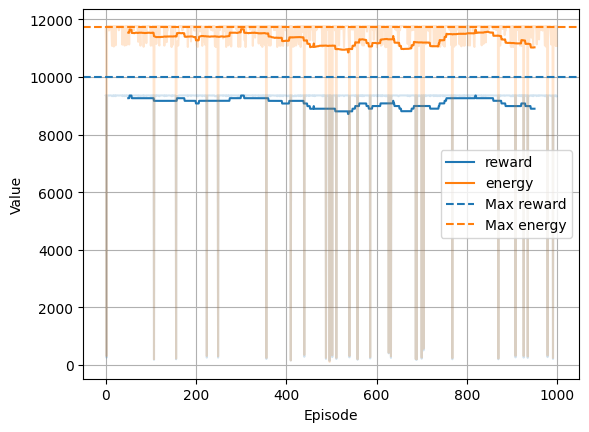

In [12]:
fig, axs = plt.subplots(1, 1)

data = pd.read_csv("./results/trpo-eval-rewards.csv")
plot_stats(data, axs)
plt.show()